**Using the Titanic dataset, I analyzed and predicted what survival depended on.**

**with Support Vector Machines**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data["Age"].median(skipna= True)

28.0

In [7]:
data["Age"].fillna(data["Age"].median(skipna= True),inplace= True)

In [8]:
print(f"%{(687/891)*100} empty")

%77.10437710437711 empty


In [9]:
data.drop("Cabin",axis = 1,inplace = True)

In [10]:
data["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [11]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
data["Embarked"].fillna("S",inplace = True)

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
data.drop(["PassengerId","Name","Ticket"],axis = 1,inplace = True)

In [15]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
columns = data.columns

In [17]:
columns = list(columns)

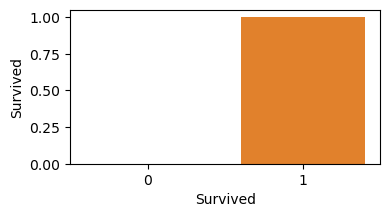

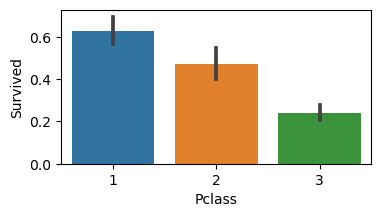

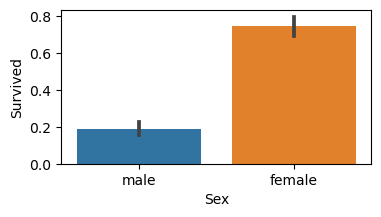

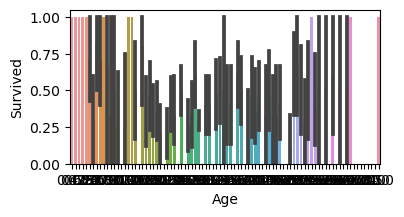

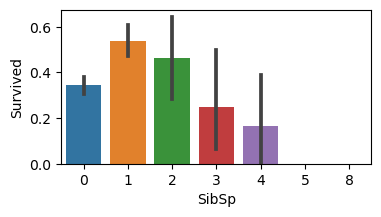

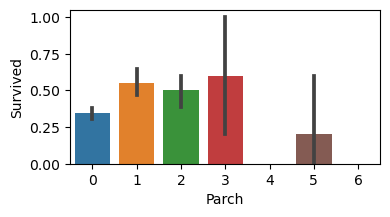

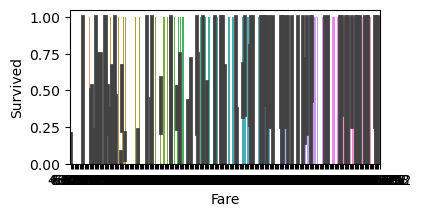

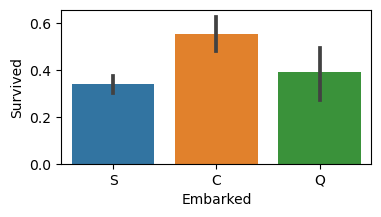

In [18]:
for i in columns:
    fig = plt.figure(figsize = (4,2))
    sns.barplot(data = data,y = "Survived",x = i)

In [19]:
X = data.drop("Survived",axis = 1)
y = data["Survived"]

In [20]:
y.value_counts()
print(f"0 -> {(y.value_counts()[0]/y.value_counts().sum())*100}")
print(f"1 -> {(y.value_counts()[1]/y.value_counts().sum())*100}")

0 -> 61.61616161616161
1 -> 38.38383838383838


In [21]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [22]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
X = pd.get_dummies(X, columns=["Embarked","Sex"], drop_first=True)

In [24]:
X

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,0
4,3,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,1
887,1,19.0,0,0,30.0000,0,1,0
888,3,28.0,1,2,23.4500,0,1,0
889,1,26.0,0,0,30.0000,0,0,1


In [25]:
X["Pclass"] = X["Pclass"].map({1 : 3, 2 : 2, 3: 1})

In [26]:
cols = X.columns

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_grid=SVC()

hyper_parameters = [{'C':[0.1,0.8, 1,2,5, 10, 100, 1000], 'kernel':['rbf'], 'gamma':['scale', 'auto', 0.001, 0.01, 0.1, 0.9]}]
grid_search = GridSearchCV(estimator = svc_grid,  
                           param_grid = hyper_parameters,
                           scoring = 'balanced_accuracy',
                           cv = 5,
                           verbose=1,
                           n_jobs=4)

In [31]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid=[{'C': [0.1, 0.8, 1, 2, 5, 10, 100, 1000],
                          'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 0.9],
                          'kernel': ['rbf']}],
             scoring='balanced_accuracy', verbose=1)

In [32]:
print(f"Best Score = {grid_search.best_score_}")
print(f"Best Parameters = {grid_search.best_params_}")
print(f"Best Estimator = {grid_search.best_estimator_}")

Best Score = 0.7999523975386044
Best Parameters = {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimator = SVC(C=1, gamma=0.1)


In [33]:
from sklearn.metrics import roc_auc_score
svc_best = SVC(C=1, kernel="rbf", gamma=0.1) 
svc_best.fit(X_train,y_train)

y_pred_best = svc_best.predict(X_test)

print(f"ROC-AUC score = {roc_auc_score(y_test, y_pred_best)}")

ROC-AUC score = 0.7814888010540184
